Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка
1. Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [7]:
df = pd.DataFrame({
    "normal_distrib1": np.random.randn(20),
    "normal_distrib2": np.random.normal(loc=5, scale=10, size=20),
    "normal_distrib3": np.random.normal(loc=10, scale=5, size=20),
    "beta_distrib": np.random.beta(1, 2, size=20),
    "uniform_distrib": np.random.uniform(size=20),
    "gumbel_distrib":np.random.gumbel(2, 4, 20)
})

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
normal_distrib1,0.281914,0.979649,-0.390047,-0.329452,-1.372046,0.674203,-0.251696,-0.301866,-0.991750,1.352848,-0.099113,-1.052354,-0.445927,1.073779,0.009881,-0.558703,0.645675,-0.651507,-1.455706,-0.384049
normal_distrib2,-7.397437,11.476939,-12.997541,-9.545940,-5.997944,15.193184,16.306891,-6.036884,-8.457408,-11.421520,3.842031,4.827968,-0.293392,3.053994,-6.148693,9.709114,3.832012,6.954851,15.570822,3.566089
normal_distrib3,18.871212,14.485542,8.980722,6.028924,12.891026,13.888366,5.705293,6.143432,15.779304,13.791245,16.772119,19.115961,11.337229,10.619284,11.168275,18.415508,17.415698,9.969677,20.043595,7.381953
beta_distrib,0.540200,0.508269,0.375350,0.215903,0.538288,0.277385,0.149687,0.489938,0.434676,0.295197,0.539813,0.046185,0.042969,0.492298,0.346612,0.553141,0.169795,0.250661,0.167297,0.113192
uniform_distrib,0.602749,0.266027,0.710072,0.332643,0.745279,0.113536,0.562847,0.581324,0.711279,0.623593,0.733456,0.460529,0.795567,0.734692,0.991511,0.910678,0.700080,0.958457,0.801941,0.271944
gumbel,3.470836,4.083600,-1.567514,-1.406126,0.647566,6.171529,-2.978479,6.287150,1.319839,6.595991,3.040126,-0.401974,2.533078,18.222143,12.676043,-2.861694,12.006759,-3.555929,14.812372,4.786803


2. Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку (с. 606): https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf

In [47]:
df = df.apply(lambda x: x.sort_values().values) 
n = df.shape[0]
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140] # з таблиці

def sum_data(array):
    return sum(array)/n

data = {i: sum_data(df[i]) for i in df}

def s_2(array, data):
    return sum([(array[i]-data)**2 for i in range(n)]) 

s2 = {i: s_2(df[i], data[i]) for i in df}

def get_w (arr, s2):
    tmp = 0
    for i in range(n//2):
        tmp += (a[i]*(arr[(n-1)-i]-arr[i]))
    return tmp**2/s2

w_pract = {i: get_w(df[i], s2[i]) for i in df}
w_theory = {i: sts.shapiro(df[i]) for i in df}

print("Практичне значення: ", w_pract)
print("Теоретичне значення: ", w_theory)


Практичне значення:  {'normal_distrib1': 0.9591836738696449, 'normal_distrib2': 0.9351958979757479, 'normal_distrib3': 0.9449844954339951, 'beta_distrib': 0.9106891987192097, 'uniform_distrib': 0.9434469886970376, 'gumbel': 0.9237730652345721}
Теоретичне значення:  {'normal_distrib1': (0.9590733647346497, 0.5255072116851807), 'normal_distrib2': (0.9351521730422974, 0.1939043253660202), 'normal_distrib3': (0.9448449015617371, 0.2955203950405121), 'beta_distrib': (0.9107760190963745, 0.0659436583518982), 'uniform_distrib': (0.9432562589645386, 0.2760700285434723), 'gumbel': (0.9236580729484558, 0.11654134094715118)}


3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/open?id=1nT1PwM3cj6VuJa8vkjdsBuNNVoDyGncZ

In [48]:
new_columns = ["Variable", "Statistics", "Distribution"]
new_df = pd.DataFrame(columns = new_columns)
new_df

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [49]:
new_df["Variable"] = df.keys()
new_df

,Variable,Statistics,Distribution
0,normal_distrib1,NaN,NaN
1,normal_distrib2,NaN,NaN
2,normal_distrib3,NaN,NaN
3,beta_distrib,NaN,NaN
4,uniform_distrib,NaN,NaN
5,gumbel,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [51]:
new_df["Distribution"] = ['normal' if 'norm' in i else 'non-normal' for i in new_df['Variable']]
new_df

,Variable,Statistics,Distribution
0,normal_distrib1,NaN,normal
1,normal_distrib2,NaN,normal
2,normal_distrib3,NaN,normal
3,beta_distrib,NaN,non-normal
4,uniform_distrib,NaN,non-normal
5,gumbel,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

In [52]:
for i in range(new_df.shape[0]):
    if 'norm' in new_df["Variable"][i]:
        new_df['Statistics'][i] = f'{df[new_df["Variable"][i]].mean()} {[df[new_df["Variable"][i]].std()]}'
new_df

,Variable,Statistics,Distribution
0,normal_distrib1,-0.16331338201467233 [0.7934281948892662],normal
1,normal_distrib2,1.3018566805950331 [9.407530021502467],normal
2,normal_distrib3,12.9402182557954 [4.664193313919013],normal
3,beta_distrib,NaN,non-normal
4,uniform_distrib,NaN,non-normal
5,gumbel,NaN,non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [54]:
for i in range (new_df.shape[0]):
    current_variable = new_df["Variable"][i]
    if 'normal' not in current_variable:
        new_df["Statistics"][i] = f'{df[current_variable].median()}[{df[current_variable].quantile(0.25)}; {df[current_variable].quantile(0.75)}]'

new_df

,Variable,Statistics,Distribution
0,normal_distrib1,-0.16331338201467233 [0.7934281948892662],normal
1,normal_distrib2,1.3018566805950331 [9.407530021502467],normal
2,normal_distrib3,12.9402182557954 [4.664193313919013],normal
3,beta_distrib,0.32090432374600497[0.16917039380890941; 0.496...,non-normal
4,uniform_distrib,0.7050761670368105[0.5372674709186118; 0.75785...,non-normal
5,gumbel,3.2554810577619433[-0.6530122613022705; 6.3643...,non-normal


8. Зберегти таблицю в пдф форматі

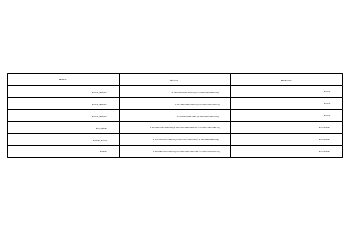

In [59]:
from matplotlib.backends.backend_pdf import PdfPages 
import matplotlib.pyplot as plt

fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(new_df)):
    cell_text.append(new_df.iloc[row])

ax.table(cellText=cell_text, colLabels=new_df.columns, loc='center')
ax.axis('off')

pdf = PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()